# CCE2502 Assignment II - Logistic Regression
### Year 2024-2025- Semester II



A number of functions are given, including the partially completed gradient descent optimizer.

Please follow instructions in the assignment specifications document.


In [2]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Do not carry out any changes to the code in this cell

def lr_loss_function(y_target,y_predicted):
    """
    y_target: actual gold labels (vector of size(m,))
    y_predicted : predicted probabilities for positive class (vector of size (m,))
    returns categorical cross entropy loss
    """
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    D is the feature matrix [m,N] where m is the number of examples
    return a vector of size (m,1)
    """
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    X is the feature matrix [m,N] where m is the number of examples
    y is the gold label vector of size (m,)
    Computes and returns the accuracy in predicting the positive class and returns a scalar
    """
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
            If N>2, first two features taken in consideration
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [4]:
# Gradient Descent algorithm that learns the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    phi : regularisation constant
    W : weights vector
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    if split_frac < 0.0:
        y_train, y_val, X_train, X_val = y_data, y_data, X_data, X_data
    else:
        split = int(y_data.shape[0]*split_frac)
        y_train, y_val, X_train, X_val  = y_data[0:split], y_data[split:], X_data[0:split], X_data[split:]
    #
    N = X_data.shape[1] # number of features
    print("Number of input features :",N)
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N+1,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to the same value
    print("Initial Weights:",W)
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        #
        #######################################################################
        #
        # Add update equations in this section 
        # W[0] is the bias term (no regularisation)
        #
        #######################################################################
    #
    #
    return {'weights':W, 
            'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

## TASK 1

Part a:

In [5]:
import csv

# Initialize lists to hold the data
X1 = []
X2 = []
y = []

# Open the CSV file
with open('binary_classification_basic.csv', newline='') as file:
    reader = csv.reader(file)
    
    #Avoid reading the headers
    next(reader)
    
    # reading the file row by row 
    for row in reader:
        X1.append(float(row[0]))  
        X2.append(float(row[1]))  
        y.append(float(row[2]))   





part b:

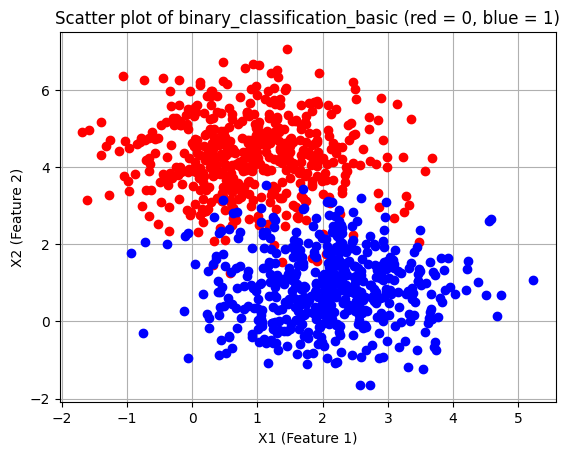

In [6]:
y = np.array(y)
X = np.column_stack((X1,X2)) #We define X as the array of shape (m,2) as required by the function

#plot the data using the function given
data_scatter_plot(X,y)
plt.grid()
plt.xlabel('X1 (Feature 1)')
plt.ylabel('X2 (Feature 2)')
plt.title('Scatter plot of binary_classification_basic (red = 0, blue = 1)')
plt.show()


part c:

Given the loss function:

$$
L(\mathbf{w}) = -\frac{1}{2m} \sum_{i=1}^m \left[ t^i \log y(\mathbf{x}^i, \mathbf{w}) + (1 - t^i) \log (1 - y(\mathbf{x}^i, \mathbf{w})) \right] + \phi \sum_{j=1}^N w_j^2
$$

where the logistic model is defined as:

$$
y(\mathbf{x}^i, \mathbf{w}) = \frac{1}{1 + \exp\left(-\sum_{j=1}^N w_j x_j^i \right)}
$$

Let $y^i = y(\mathbf{x}^i, \mathbf{w})$.  
Then, the partial derivative with respect to $w_k$, for $k \in \{1, 2, \dots, N\}$, is:

$$
\frac{\partial L(\mathbf{w})}{\partial w_k} = -\frac{1}{2m} \sum_{i=1}^m (t^i - y^i) x_k^i + 2\phi w_k
$$

Note that for $k = 0$, the regularization term is not applied. The derivative becomes:

$$
\frac{\partial L(\mathbf{w})}{\partial w_0} = -\frac{1}{2m} \sum_{i=1}^m (t^i - y^i) x_0^i
$$

where $x_0^i = 1$ for all $i$.

All working is attatched as a pdf, titled 'Partial_derivative_working'


part d:

The lr_train_model function was redefined in the cell below using the gradient descent update equation.

NOTE: Although one comment states that the input matrix $X$ should include a bias term, the function predict_y_prob() is called and it expects $X$ without the bias term.

Therefore, it is assumed that the comment is incorrect, and the function is intended to receive $X$ without the bias term. The bias is instead handled within the gradient descent update equations by adding a bias column of 1's to $X$.



To make the algorithm more effecient, numpy arrays were used like matrices to compute all of the new weights in one vector. The following derivation was used:

We use gradient descent to update the weight vector $\mathbf{w}$:

$$
\mathbf{w} = \mathbf{w} - \alpha \cdot \nabla L(\mathbf{w})
$$

where the gradient is defined as:

$$
\nabla L(\mathbf{w}) =
\begin{pmatrix}
\frac{\partial L(\mathbf{w})}{\partial w_0} \\
\frac{\partial L(\mathbf{w})}{\partial w_1} \\
\vdots \\
\frac{\partial L(\mathbf{w})}{\partial w_N}
\end{pmatrix}
$$

For $k \in \{1, 2, \dots, N\}$:

$$
\frac{\partial L(\mathbf{w})}{\partial w_k} = -\frac{1}{2m} \sum_{i=1}^{m} (t^{(i)} - y^{(i)}) x_k^{(i)} + 2\phi w_k
$$

And for the bias term $w_0$:

$$
\frac{\partial L(\mathbf{w})}{\partial w_0} = -\frac{1}{2m} \sum_{i=1}^{m} (t^{(i)} - y^{(i)}) x_0^{(i)}
$$

where $x_0^{(i)} = 1$ for all $i$.

Now, observe that the gradient (excluding regularization term) can be written as:

$$
\begin{pmatrix}
\sum_{i=1}^{m} (t^{(i)} - y^{(i)}) x_0^{(i)} \\
\sum_{i=1}^{m} (t^{(i)} - y^{(i)}) x_1^{(i)} \\
\vdots \\
\sum_{i=1}^{m} (t^{(i)} - y^{(i)}) x_N^{(i)}
\end{pmatrix}
= X^\top (\mathbf{t} - \mathbf{y})
$$

Therefore, the gradient including regularization becomes:

$$
\nabla L(\mathbf{w}) = -\frac{1}{2m} X^\top (\mathbf{t} - \mathbf{y}) + 2\phi 
\begin{pmatrix}
0 \\
w_1 \\
\vdots \\
w_N
\end{pmatrix}
$$

Here, the regularization term does not affect $w_0$, hence the 0 in the first row of the column vector.

Note that $\mathbf{t}$ denotes the vector of actual class labels of the training data, of size $(m, 1)$, and $\mathbf{y}$ denotes the vector of predicted probabilities (i.e., outputs of the logistic function), also of size $(m, 1)$.


Note that infomation about numpy was taken from the online numpy API.

In [7]:
# Gradient Descent algorithm that learns the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model_modified(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    phi : regularisation constant
    W : weights vector
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    if split_frac < 0.0:
        y_train, y_val, X_train, X_val = y_data, y_data, X_data, X_data
    else:
        split = int(y_data.shape[0]*split_frac)
        y_train, y_val, X_train, X_val  = y_data[0:split], y_data[split:], X_data[0:split], X_data[split:]
    #
    N = X_data.shape[1] # number of features
    print("Number of input features :",N)
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N+1,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to the same value
    print("Initial Weights:",W)
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        #######################################################################
        #Gradient descent update equation

        #Adding the bias column of 1's to X
        X_bias = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)  # shape: [m, N+1]
        
        # Calculating t - y as required by the derivation.
        difference = ( y_train - y_pred_pr ).reshape(-1, 1)  # shape: [m, 1]

        # Calculating the gradient vector without regularization using matrix multiplication
        grad = -(1/(2*m)) * np.matmul(X_bias.T, difference)  # shape: [N+1, 1]
        
        # calculate the regularization term ensuring 0 for w0
        reg = 2 * phi * W
        reg[0] = 0 # shape: [N+1, 1]
        
        # Final gradient
        grad += reg
        
        # Update weights
        W = W - alpha * grad

      
        #######################################################################
        #
    #
    return {'weights':W, 
            'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

    

part e:

Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.94375
val acc   :  0.925
Weights :  [ 0.81037356  1.25283137 -1.21166061]


0

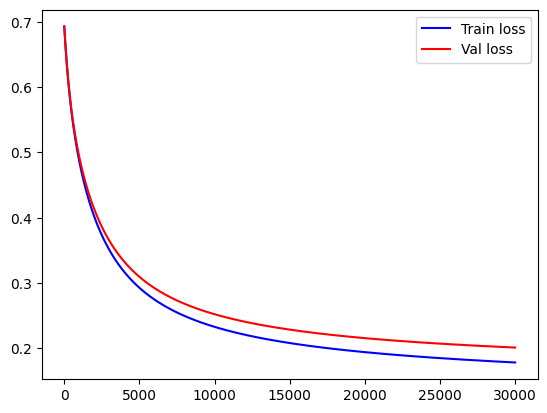

In [8]:
#Note the numberof iterations is set to 30000 becasue the val loss and the train loss seem to converge.
model = lr_train_model_modified(X, y, no_iterations=30000)
display_results(model)


As shown by the results above, both the training and validation loss decrease significantly over time, indicating effective learning. The model achieves a validation accuracy and prediction accuracy above 0.9, indicating an effective performance. However, the accuracies are not perfect because the dataset is not entirely linearly separable since there is still some overlap between classes, as observed in the scatter plot.

part f:

$$
\textbf{Logistic Regression Prediction Function:} \\
y(\mathbf{x}) = \frac{1}{1 + \exp\left( -\left( w_0 + w_1 x_1 + w_2 x_2 \right) \right)}
$$

$$
\text{Derivation for the decision boundary, which is where the predicted probability using the sigmoid function is } 0.5:
$$

$$
\frac{1}{1 + \exp\left( -\left( w_0 + w_1 x_1 + w_2 x_2 \right) \right)} = 0.5
$$

$$
1 = (1 + \exp(- (w_0 + w_1 x_1 + w_2 x_2))) \cdot 0.5
$$

$$
2 = 1 + \exp\left( -\left( w_0 + w_1 x_1 + w_2 x_2 \right) \right)
$$

$$
1 = \exp\left( -\left( w_0 + w_1 x_1 + w_2 x_2 \right) \right)
$$

$$
\ln(1) = - (w_0 + w_1 x_1 + w_2 x_2)
$$

$$
0 = - (w_0 + w_1 x_1 + w_2 x_2)
$$

$$
 w_0 + w_1 x_1 + w_2 x_2 = 0
$$

$$
\therefore \quad x_2 = -\frac{w_0 + w_1 x_1}{w_2}
$$

$$
\text{This is the equation of the decision boundary in the feature space}
$$


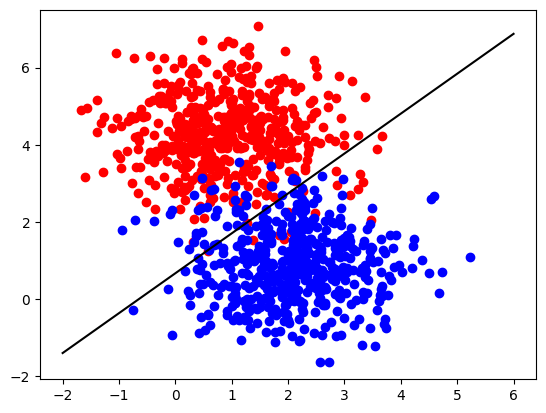

In [9]:
# Plotting the decision boundary with Feature 1 on the x-axis and Feature 2 on the y-axis.
# Based on the previous scatter plot, Feature 1 values approximately range from -2 to 6,
# so a linspace in that range was chosen for plotting the decision boundary.
x_line = np.linspace(-2, 6, 100)

# Retrieving the weights from the trained model.
coeffs = model['weights']

# Computing points on the decision boundary using the linear equation derived above.
y_line = -(coeffs[0] + coeffs[1] * x_line) / coeffs[2]

# Plotting the data and the decision boundary.
data_scatter_plot(X, y)
plt.plot(x_line, y_line, color="black")


## TASK 2


part a:

In [10]:

# Initialize lists to hold the data
X1_circles = []
X2_circles = []
y_circles = []

# Open the CSV file
with open('binary_classification_advanced.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    
    #Avoid reading the headers
    next(csvreader)
    
    # reading the file row by row 
    for row in csvreader:
        X1_circles.append(float(row[0]))  
        X2_circles.append(float(row[1]))  
        y_circles.append(float(row[2]))   


part b:

Text(0.5, 1.0, 'Scatter plot of binary_classification_advanced (red = 0, blue = 1)')

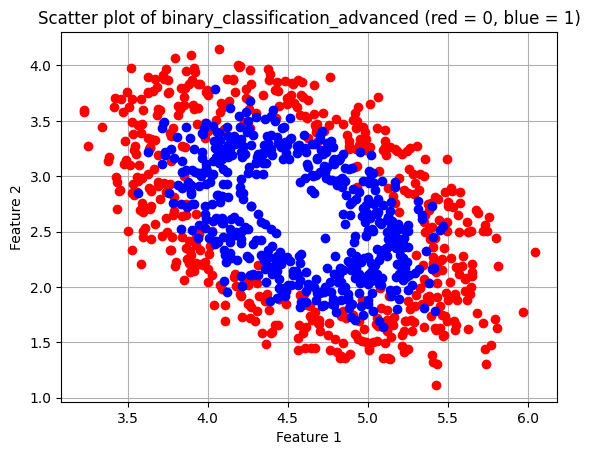

In [11]:
y_circles = np.array(y_circles)
X_circles = np.column_stack((X1_circles,X2_circles)) #We define X as the array of shape (m,2) as required
data_scatter_plot(X_circles,y_circles)
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of binary_classification_advanced (red = 0, blue = 1)')


part c:

Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.61125
val acc   :  0.565
Weights :  [-0.00148833  0.03192824 -0.03849335]


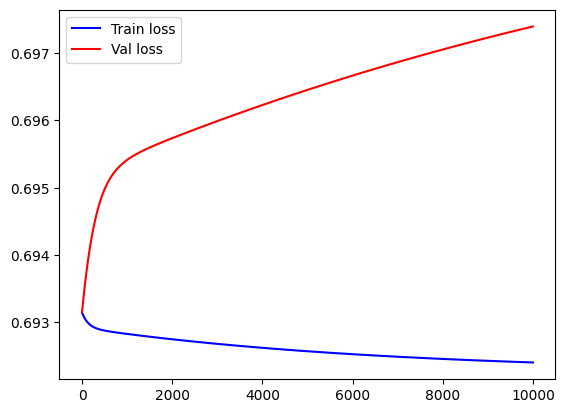

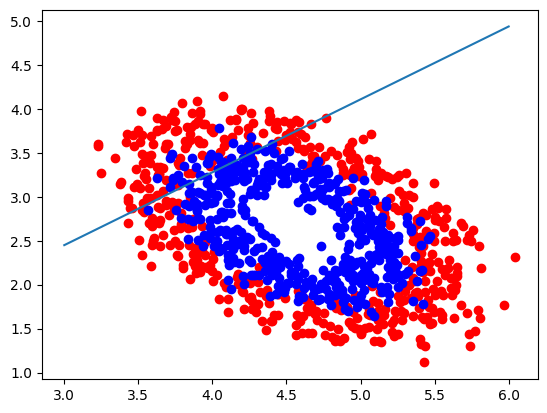

In [12]:
#Training a model based on the new dataset
model = lr_train_model_modified(X_circles, y_circles, no_iterations=10000)
display_results(model)

#plotting the decision boundary of the model
x_line = np.linspace(3, 6, 100)
coeffs = model['weights']
y_line = -(coeffs[0] + coeffs[1]*x_line)/coeffs[2]

plt.figure()
data_scatter_plot(X_circles,y_circles)
plt.plot(x_line, y_line )


The plots above demonstrate that a linear decision boundary, regardless of its orientation, is insufficient for accurate classification.
This can be seen from the fact that the accuracy is around 0.5 which is as good as a random guess.

This is because the dataset is not linearly separable, meaning no straight line can effectively separate the classes. Observing the scatter plot of the data suggests that an elliptical boundary would be more appropriate, implying the need for a quadratic decision boundary involving squared terms and products of features.

Hence, a model restricted to 2 linear terms can only produce a linear decision boundaries. To capture the underlying structure of the data and achieve a more accurate separation, it is necessary to incorporate non-linear terms.

part d:

Since the decision boundary appears to be elliptical, hence we must consider the general form of a quadratic.

To model an elliptical boundary, the equation must include all terms involved in a quadric in non-canonical form. The general equation is shown below:

$$
f(X_1, X_2) = a_0 + a_1 X_1 + a_2 X_2 + a_3 X_1 X_2 + a_4 X_1^2 + a_5 X_2^2
$$

Another effective way to help increase the accuracy of the model is to move the mean of the data to 0. Then we note how an ellipse centered at 0 only requires terms in $X_1^2$, $X_2^2$ and $X_1 X_2$. This will reduce the number of weights the model has to learn.

Number of input features : 3
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.87625
val acc   :  0.87
Weights :  [ 2.53860492 -3.83443078 -3.38738308 -1.70994552]


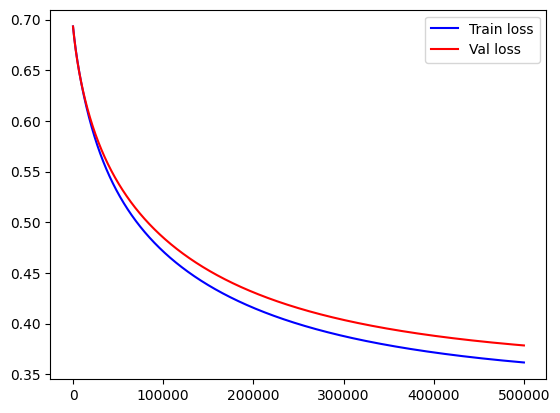

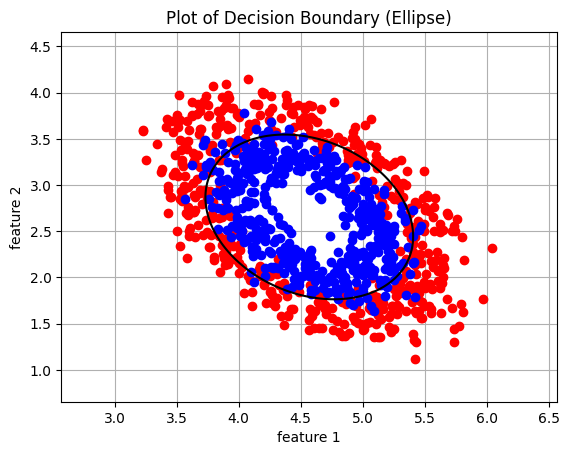

In [13]:
#Step 1: Center the data about the origin
mean = np.mean(X_circles, axis=0)
X_centered = X_circles - mean

#Step 2: Construct polynomial features for a quadratic boundary
X_poly = np.hstack((
    (X_centered[:, 0]**2).reshape(-1, 1),         # X_1^2
    (X_centered[:, 1]**2).reshape(-1, 1),         # X_2^2
    (X_centered[:, 0] * X_centered[:, 1]).reshape(-1, 1)  # (X_1)(X_2)
))

#Step 3: Train the model using polynomial features
#Note that the number of iterations is set to 500000 because the val loss and train loss do not converge otherwise .
model = lr_train_model_modified(X_poly, y_circles, no_iterations=500000)
display_results(model)
coeffs = model['weights']

#Step 4: Generate a meshgrid around the original data to plot the implicit function.
lin_w = np.linspace(mean[0] - 2, mean[0] + 2, 400)
lin_z = np.linspace(mean[1] - 2, mean[1] + 2, 400)
W, Z = np.meshgrid(lin_w, lin_z)

#Step 5: Center the meshgrid to match training coordinates (centre 0)
W_centered = W - mean[0]
Z_centered = Z - mean[1]

#Step 6: Evaluate the values of the surface in 3D by the implicit function (we will use the level curve at z=0)
F = (
    coeffs[0]
    + coeffs[1] * (W_centered ** 2)
    + coeffs[2] * (Z_centered ** 2)
    + coeffs[3] * (W_centered * Z_centered)
)

#Step 7: Plot the data and decision boundary
#Use the uncentered meshgrid to mimic a translation of the ellipse centered at 0 to an ellipse centered at the mean.
plt.figure()
data_scatter_plot(X_circles, y_circles)
plt.contour(W, Z, F, levels=[0], colors='black')  # Plot the level curve on the xy plane at z=0 
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plot of Decision Boundary (Ellipse)')
plt.grid(True)
plt.show()



The decision boundary has now taken the shape of an ellipse as expected. After 500000 iterations the ellipse seems to have taken the shape of the true decision boundary.
Th accuracies are both around 0.85, which is a major improvement over the previous 0.5.

To confirm that the combination of terms used was the best, the process shall be repeated with different possible combinations of terms confined to a maximun degree of 3. (eg X_1^3, X_1X_2^2, X_1^2X2...)

This produces a total of 9 different terms possible, and we must take all possible subsets of these 9 terms(since order doesnt matter), this produces 2^9= 512 different combinations. This means that the loop will take quite some time to execute.

Note that all information about the combinations module came from : https://docs.python.org/3/library/itertools.html

In [14]:
from itertools import combinations

#Note that the combinations module will be used to produce all possible combinations of k terms.

# Step 1: Center the data about the origin as before.
mean = np.mean(X_circles, axis=0)
X_centered = X_circles - mean


results = []  # To store (train accuracy, validation accuracy, combination of terms)


# Step 2: Define all possible.
# Note that we are defining terms as (X_1^i)*(X_2^j), where i and j can beany natural number.
# The max_deg represnts the maximun value i+j can take, so as not to include too many terms, but still leave a good number of possibilities.

max_deg = 3
all_terms = [(i, j) for i in range(max_deg + 1) for j in range(max_deg + 1) if (i+j>0) and (i + j <= max_deg)]
print(all_terms)

# Step 3: Loop over all non-empty combinations of these terms, that contain at least 2 terms that have a non-zero instance of X1 and X2.
for k in range(2, len(all_terms)+1):
    for term_comb in combinations(all_terms, k):

        #making sure that there is at least 1 squared term in X1 and X2, since data is non-linearly seperable.
        max_1 = 0
        max_2 = 0
        for (i,j) in term_comb:
            max_1 = np.max(np.array([max_1,i]))
            max_2 = np.max(np.array([max_1,j]))
        if (max_1>1 and max_2>1):

            # Creating the features in the shape of the terms combination
            X_poly = np.hstack([
                ((X_centered[:, 0]**i) * (X_centered[:, 1]**j)).reshape(-1, 1)
                for (i, j) in term_comb
            ])


            # Only 5000 iterations are being used because we only need to check how the dfferent combinations compare relative to eachother.
            # This will keep the algorithm shorter.
            model = lr_train_model(X_poly, y_circles, no_iterations=5000)

            # Record validation accuracy
            val_acc = model['val_acc']
            t_acc = model['train_acc']
            results.append((t_acc, val_acc, term_comb))

# Sort by accuracies in descending order 
sorted_results_acc = sorted(results, reverse=True, key=lambda x: x[0])
sorted_results_val_acc = sorted(results, reverse=True, key=lambda x: x[1])

# Display top 3 based on both accuricies
print("\ntrain accuracy\n")
for t_acc,val_acc, comb in sorted_results_acc[:3]:
    print(f"Accuracy: {t_acc:.4f}, Terms: {comb}")

print("\nvalue  accuracy\n")
for t_acc,val_acc, comb in sorted_results_val_acc[:3]:
    print(f"Accuracy: {val_acc:.4f}, Terms: {comb}")

[(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0)]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
Num

We shall take the first result for each of the accuracies and train a model based on the combinaton of terms proposed, and compare it to the ellipse first proposed.
The top result for training accuracy is the polynomial with terms: X_1, X_2, X_1X_2, X_1^3, X_2^3, X_1*X_2^2, X_1^2*X_2
The top result for value accuracy is the polynomial with terms: X_1, X_2, X_1X_2, X_1^3, X_1*X_2^2, X_2^3

Number of input features : 7
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.60875
val acc   :  0.625
Weights :  [ 0.19145761  0.0355182   0.02749851 -0.04457913 -0.13135202  1.00031217
 -0.02370894  0.06717874]


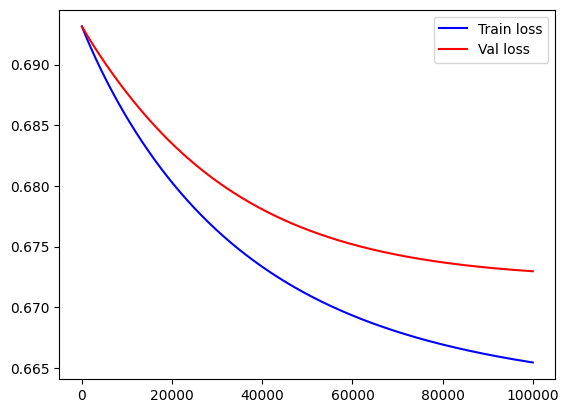

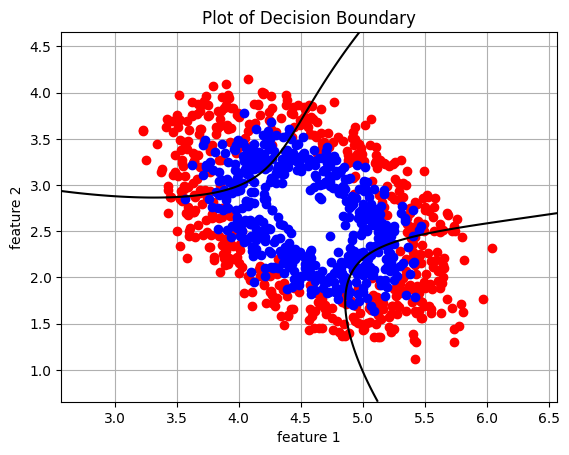

In [30]:
#Step 1: Center the data about the origin
mean = np.mean(X_circles, axis=0)
X_centered = X_circles - mean

#Step 2: Construct polynomial features for a quadratic boundary
X_poly = np.hstack((
    (X_centered[:, 0]).reshape(-1, 1),  # (X_1)
    (X_centered[:, 1]).reshape(-1, 1),  # (X_2)
    (X_centered[:, 0]**3).reshape(-1, 1),  # (X_1)^3
    (X_centered[:, 1]**3).reshape(-1, 1),  # (X_2)^3
    (X_centered[:, 0] * X_centered[:, 1]).reshape(-1, 1) , # (X_1)(X_2)
    (X_centered[:, 0] * (X_centered[:, 1]**2)).reshape(-1, 1),  # (X_1)(X_2)^2
    ((X_centered[:, 0]**2) * X_centered[:, 1]).reshape(-1, 1)  # (X_1)^2(X_2)
))


#Step 3: Train the model using polynomial features
#Note that the number of iterations is set to 100000 so that the val loss and train loss converge.
model = lr_train_model_modified(X_poly, y_circles, no_iterations=100000)
display_results(model)
coeffs = model['weights']

#Step 4: Generate a meshgrid around the original data to plot the implicit function.
p = np.linspace(mean[0] - 2, mean[0] + 2, 400)
q = np.linspace(mean[1] - 2, mean[1] + 2, 400)
P, Q = np.meshgrid(p, q)

#Step 5: Center the meshgrid to match training training data co-ordinates
P_centered = P - mean[0]
Q_centered = Q - mean[1]

#Step 6: Evaluate the values of the surface in 3D by the implicit function (we will use the level curve at z=0)
F = (
    coeffs[0]
    + coeffs[1] * (P_centered)
    + coeffs[2] * (Q_centered)
    + coeffs[3] *(P_centered**3)
    + coeffs[4] *(Q_centered**3)
    + coeffs[5] * (P_centered * Q_centered)
    + coeffs[6] * (P_centered * (Q_centered**2))
    + coeffs[7] * ((P_centered**2) * (Q_centered))
)

#Step 7: Plot the data and decision boundary
#Use the uncentered meshgrid to mimic a translation of the ellipse centered at 0 to an ellipse centered at the mean.
plt.figure()
data_scatter_plot(X_circles, y_circles)
plt.contour(P, Q, F, levels=[0], colors='black')  # Plot the level curve on the xy plane at z=0 
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plot of Decision Boundary')
plt.grid(True)
plt.show()

Number of input features : 6
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.55875
val acc   :  0.6
Weights :  [ 0.11448749 -0.03437907  0.04100194  0.07330826 -0.10955534  0.87875064
 -0.05163633]


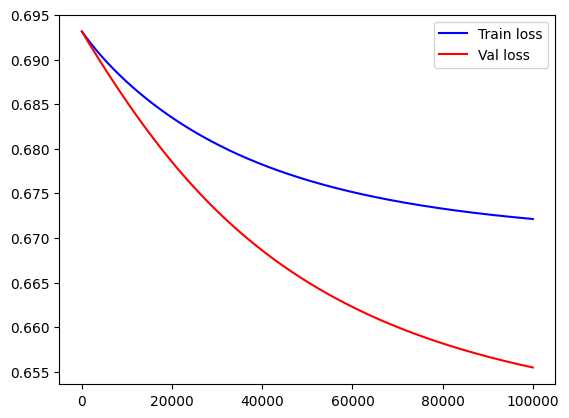

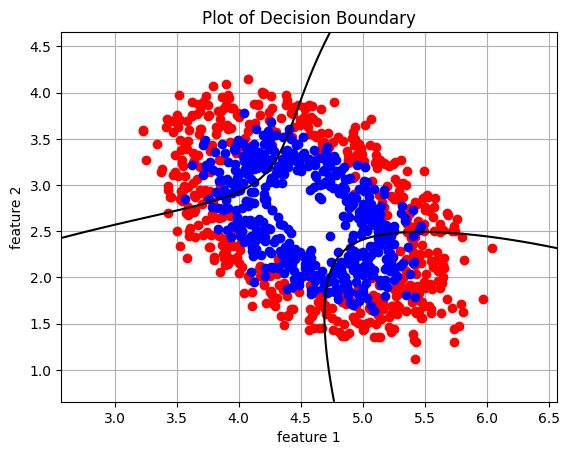

In [28]:
#Step 1: Center the data about the origin
mean = np.mean(X_circles, axis=0)
X_centered = X_circles - mean

#Step 2: Construct polynomial features for a quadratic boundary
X_poly = np.hstack((
    (X_centered[:, 0]).reshape(-1, 1),  # (X_1)
    (X_centered[:, 1]).reshape(-1, 1),  # (X_2)
    (X_centered[:, 0]**3).reshape(-1, 1),  # (X_1)^3
    ((X_centered[:, 0])*(X_centered[:, 1]**2)).reshape(-1, 1),  # (X_1)*(X_2)^2
    (X_centered[:, 0] * X_centered[:, 1]).reshape(-1, 1),  # (X_1)(X_2)
    (X_centered[:, 1]**3).reshape(-1, 1) # (X_2)^3
))


#Step 3: Train the model using polynomial features
#Note that the number of iterations is set to 100000 so that the val loss and train loss converge.
model = lr_train_model_modified(X_poly, y_circles, no_iterations=100000)
display_results(model)
coeffs = model['weights']

#Step 4: Generate a meshgrid around the original data to plot the implicit function.
p = np.linspace(mean[0] - 2, mean[0] + 2, 400)
q = np.linspace(mean[1] - 2, mean[1] + 2, 400)
P, Q = np.meshgrid(p, q)

#Step 5: Center the meshgrid to match training training data co-ordinates
P_centered = P - mean[0]
Q_centered = Q - mean[1]

#Step 6: Evaluate the values of the surface in 3D by the implicit function (we will use the level curve at z=0)
F = (
    coeffs[0]
    + coeffs[1] * (P_centered)
    + coeffs[2] * (Q_centered)
    + coeffs[3] *(P_centered**3)
    + coeffs[4] *(P_centered)*(Q_centered**2)
    + coeffs[5] * (P_centered * Q_centered)
    + coeffs[6] *(Q_centered**3)
)

#Step 7: Plot the data and decision boundary
#Use the uncentered meshgrid to mimic a translation of the ellipse centered at 0 to an ellipse centered at the mean.
plt.figure()
data_scatter_plot(X_circles, y_circles)
plt.contour(P, Q, F, levels=[0], colors='black')  # Plot the level curve on the xy plane at z=0 
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plot of Decision Boundary')
plt.grid(True)
plt.show()

This results are clearly not valid with a very low accuracy, and a shape that does not resemble the true decision boundary.
Hence the ellipse in the beginning is the best result.

## TASK 3

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

part a:



A neural network learns non-linearly separable data by passing inputs through multiple hidden layers, where each neuron applies learned weights and non-linear activation functions (e.g., ReLU, sigmoid). These non-linear transformations reshape the data at each layer, gradually converting it into a space where linear separation becomes possible. During training, the network updates its weights to minimize a loss function using backpropagation and gradient descent. The essential part is the multiple layers and the use of non-linear functions. These allows the model to capture the shape of the boundary by transforming the data.



part b:

First we will iterate over various possible combinations for the hidden layer value and store the combination that gives the optimal accuracy.

Note that all information about the standard scaler module came from: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform

In [18]:
from sklearn.preprocessing import StandardScaler

#A standard scaler is being used to scale the data to 0 mean and unit variance to help improve the accuracy of the model
scaler = StandardScaler()

#splitting the dataset into training an testing
X_train, X_test, Y_train, Y_test = train_test_split(X_circles, y_circles, test_size=0.2)

# Scaling the training set based on its mean and variance
X_train_scaled = scaler.fit_transform(X_train)

# Scaling the test set based on the training set mean and variance
X_test_scaled = scaler.transform(X_test)

# Hidden layer sizes to test
temp = temp = np.arange(1, 21, 1)

# Storing the accuracies of each model for 1 hidden layer
accuracies_1 = []

# Searching over all layer sizes proposed for 1 hidden layer
for i in range(len(temp)):
    
    model = MLPClassifier(hidden_layer_sizes=(temp[i]), activation='relu',
                        solver='adam', alpha=0.001, max_iter=2000)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    acc = (Y_pred == Y_test).mean()
    accuracies_1.append((acc, temp[i]))

# Sort and print best hidden layer size for 1 hidden layer
best_1 = max(accuracies_1, key=lambda x: x[0])
print(f"Best Accuracy: {best_1[0]:.4f} with 1 hidden layer ({best_1[1]})")

# Storing the accuracies of each model for 2 hidden layer
accuracies_2 = []

# Searching over all layer sizes proposed for 2 hidden layer
for i in range(len(temp)):
    for j in range(len(temp)):
        model = MLPClassifier(hidden_layer_sizes=(temp[i], temp[j]), activation='relu',
                              solver='adam', alpha=0.001, max_iter=2000)
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_test_scaled)
        acc = (Y_pred == Y_test).mean()
        accuracies_2.append((acc, temp[i], temp[j]))

# Sort and print best hidden layer sizes for 2 hidden layers
best_2 = max(accuracies_2, key=lambda x: x[0])
print(f"Best Accuracy: {best_2[0]:.4f} with 2 hidden layers ({best_2[1]}, {best_2[2]})")

Best Accuracy: 0.9250 with 1 hidden layer (13)
Best Accuracy: 0.9300 with 2 hidden layers (9, 3)


Since 2 hidden layers offered the best result, the MLP shall be trained using 2 layers.

Test Accuracy: 0.9


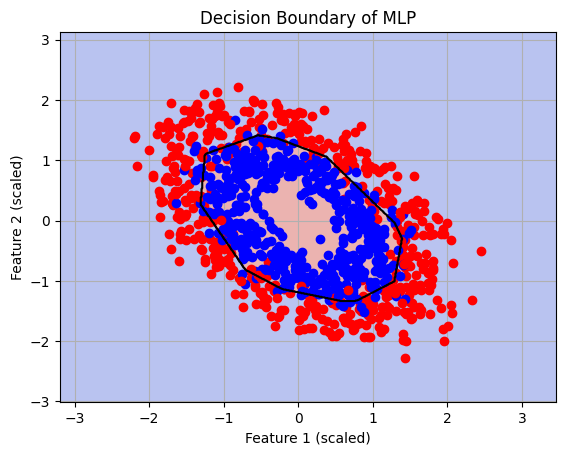

In [36]:

X_train, X_test, Y_train, Y_test = train_test_split(X_circles,y_circles,test_size=0.2)

#Test and training data are scaled seperately so the test data does not affect the unit mean and variance, skewing the results
X_train_scaled = scaler.fit_transform(X_train)
#Note that scaler.transform uses the already learned mean and variance to scale.
X_test_scaled = scaler.transform(X_test)


perceptron = MLPClassifier(hidden_layer_sizes=(9,3), activation='relu', solver = 'adam', alpha = 0.001, max_iter = 2000)
perceptron.fit(X_train_scaled, Y_train)
Y_predictions = perceptron.predict(X_test_scaled)
accuracy = (Y_predictions == Y_test).mean()
print("Test Accuracy:", accuracy)

# Create a meshgrid based on the scaled training data
h = 0.01  # mesh step size
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
L, R = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the grid to obtain the decision boundary
Z = perceptron.predict(np.c_[L.ravel(), R.ravel()])
Z = Z.reshape(L.shape)

#Plot the test and train points
data_scatter_plot(X_train_scaled, Y_train)
data_scatter_plot(X_test_scaled, Y_test)


# Add a decision boundary
plt.contourf(L, R, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.contour(L, R, Z, levels=[0], colors='k')



plt.title("Decision Boundary of MLP")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()


Calculating the mean accuracy over 50 runs.

In [35]:

accuracies = []

for i in range(50):
    # Split and scale
    X_train, X_test, Y_train, Y_test = train_test_split(X_circles, y_circles, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train
    perceptron = MLPClassifier(hidden_layer_sizes=(9,3), activation='relu',
                               solver='adam', alpha=0.001, max_iter=2000)
    perceptron.fit(X_train_scaled, Y_train)

    # Evaluate
    Y_pred = perceptron.predict(X_test_scaled)
    acc = (Y_pred == Y_test).mean()
    accuracies.append(acc)

# Compute mean and std
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print(f"\nAfter 100 runs:")
print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"Standard Deviation: {std_acc:.4f}")


After 100 runs:
Mean Accuracy: 0.8892
Standard Deviation: 0.0562


The model is very accurate at approximitely 90%, with a decision boundary that looks to fit the data well.
Note that the accuracy is not higher because there is still some overlap between the data points of different classes.

part c: 

Some qualitative measures that could be taken to ensure this neural network is wroking correctly are: 

1) Take a few instances from the dataset that have obvious classes, like taking a point in the middle of the concentric circles (blue class) and taking a point outside the concentric circles (red class). Then check to see if they are correctly classified. If not, this indicates overfitting.

2) Observe the decision boundary and check to see if it fits the data well, and has the expected shape. In this case the expected shape is an ellipse, and it seems to fit the boundary well.

3) Monitor the network’s output over time during training. If the predictions change gradually and converge, this suggests the model is learning. Conversely, if outputs are random or static, it may indicate issues with the model.



Note that the only assistence used for this assignment was the online documentations for the python modules.
AI was used to suggest what python modules offer the best solutions and to help with plotting implicit functions.
A document of a chat history with chatgpt is included in the assignment folder. 